# Trajectory Generation with Fixed-k Privacy Protection

This notebook implements experiments for generating and evaluating privacy-protected trajectories using a GRU-based model with a fixed-k approach. It loads the pre-trained models and test data for the Porto and San Francisco datasets, generates protected trajectories for different values of k, and evaluates the results by computing point-to-point distances (MDE) between real and protected trajectories. 

The computed MDE_k values are used for setting up the adaptive k approach.

##### **Imports**

In [1]:
import os
# oneDNN warning suppression TF 2.4.1
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import copy

import numpy as np
import pandas as pd
import pickle
import statistics

from scipy.stats import energy_distance, wasserstein_distance
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from math import radians
from sklearn.metrics.pairwise import haversine_distances

from utils.data import *
from utils.plots import *
from utils.metrics import *
from models import *
from apu_trajgen import *

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

## **Experiments**

#### **Load Data (Porto dataset)** 

In [ ]:
# Load the model generated by the training script from the 'training' folder
selected_dataset = "PORTO"

subset = "test" # or "train" 

# Load the test data
X_t = load_pickle(DATA_FOLDER + selected_dataset.lower() + "_X_"+subset+".pkl") # the input trajectory data
Y_t = load_pickle(DATA_FOLDER + selected_dataset.lower() + "_Y_"+subset+".pkl") # the true values of the trajectory data
traj_seq_lengths = load_pickle(DATA_FOLDER + selected_dataset.lower() + "_seq_len_"+subset+".pkl") # the sequence lenght of the input trajectory data
normalization_ranges = load_pickle(DATA_FOLDER + selected_dataset.lower() + "_normalization_ranges_"+subset+".pkl") # the min and max values for each feature in the trajectory data


#### **Load Model** 

In [3]:
# Load the pre-trained model
mdl = load_pickle(MODEL_FOLDER + "mdlgru-"+selected_dataset.lower()+".pkl")

# Create the model for generating trajectories with BS = 1
model_sl = create_GRU_model(GRU_cells= LSTM_CELLS,
                          seq_len = 1,
                          num_feat = NUM_FEATS,
                          batch_size = 1,
                          stateful = True,
                          return_seq = RETURN_SEQ,
                          num_outputs = NUM_OUTPUTS,
                          LR = LR,
                          SEED = SEED,
                          ragged = False)


# Load the weights and states from the pre-trained model
model_sl.set_weights(mdl.get_weights())

#### **Experiment 1 (Porto dataset) - Fixed k -** 

In [4]:
# Set the number of trajectories to generate/protect
n_trajs = 10

In [5]:
Y_PREDS_Ks = {}

save_pickle(Y_t[:n_trajs], DATA_FOLDER + selected_dataset.lower() + "_Y_test_fixed_k_ntrajs_" + str(n_trajs) + ".pkl")
save_pickle(traj_seq_lengths[:n_trajs], DATA_FOLDER + selected_dataset.lower() + "_test_seq_len_fixed_k_ntrajs_" + str(n_trajs) + ".pkl")

for k in range(1, 6):
    print("Generating trajectories with k = " + str(k))
    
    # Generate the trajectories using the APU Trajectory Generator with fixed k
    # The function apu_trajgen_fixed_k generates trajectories with a fixed k value
    # It uses the model_sl, input trajectory data X_t, sequence lengths traj_seq_lengths,
    # and other parameters to generate the trajectories.
    Y_pred_k = apu_trajgen_fixed_k(mdl = model_sl,
                                X_t = copy.deepcopy(X_t)[:n_trajs],
                                test_traj_seq_lengths = traj_seq_lengths,
                                SEQ_LENGTH = 1,
                                NUM_FEATS = NUM_FEATS,
                                k_steps=k)
    
    
    save_pickle(Y_pred_k, DATA_FOLDER + selected_dataset.lower() + "_Y_pred_fixed_k_" + str(k) + "_ntrajs_" + str(n_trajs) + ".pkl")
    
    Y_PREDS_Ks[k] = Y_pred_k

Generating trajectories with k = 1
Processing trajectory: 0
Processing trajectory: 1
Processing trajectory: 2
Processing trajectory: 3
Processing trajectory: 4
Processing trajectory: 5
Processing trajectory: 6
Processing trajectory: 7
Processing trajectory: 8
Processing trajectory: 9
Generating trajectories with k = 2
Processing trajectory: 0
Processing trajectory: 1
Processing trajectory: 2
Processing trajectory: 3
Processing trajectory: 4
Processing trajectory: 5
Processing trajectory: 6
Processing trajectory: 7
Processing trajectory: 8
Processing trajectory: 9
Generating trajectories with k = 3
Processing trajectory: 0
Processing trajectory: 1
Processing trajectory: 2
Processing trajectory: 3
Processing trajectory: 4
Processing trajectory: 5
Processing trajectory: 6
Processing trajectory: 7
Processing trajectory: 8
Processing trajectory: 9
Generating trajectories with k = 4
Processing trajectory: 0
Processing trajectory: 1
Processing trajectory: 2
Processing trajectory: 3
Processing

#### **Plot a Trajectory** 

<Figure size 640x480 with 0 Axes>

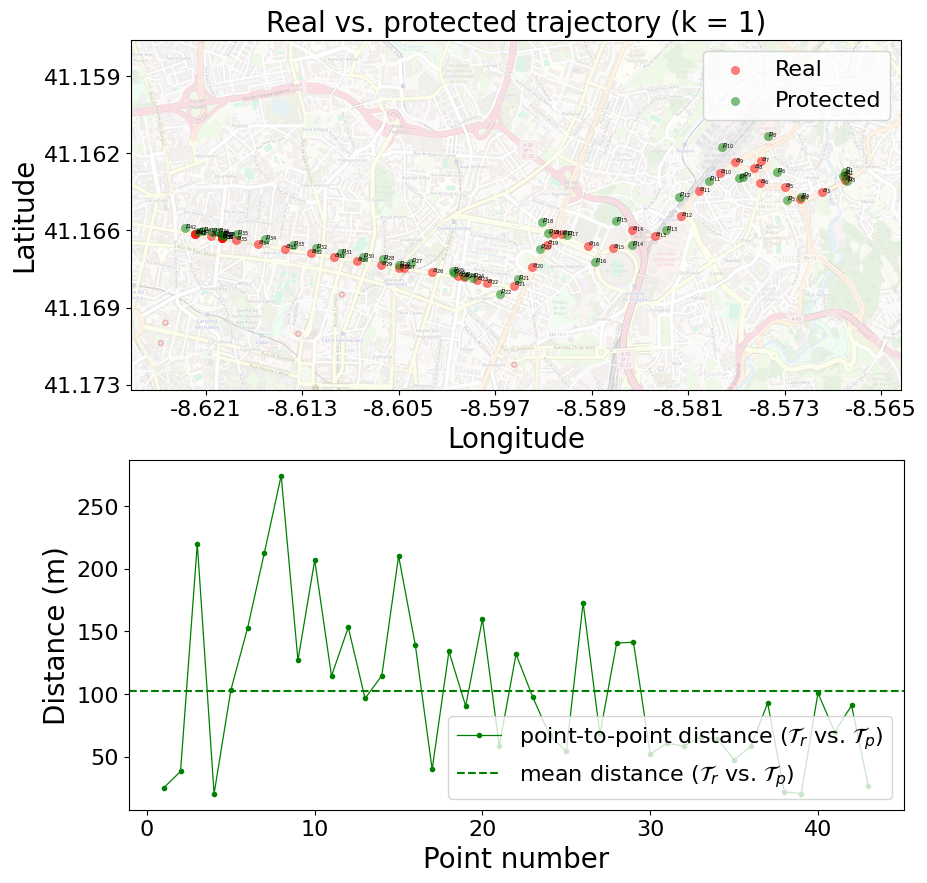

Point-to-point distance between the real and protected trajectory:
[np.float64(25.130232387984588), np.float64(38.19258140926986), np.float64(219.88346047727566), np.float64(20.31218821326161), np.float64(103.14857604914489), np.float64(152.92826965514976), np.float64(212.91917673067496), np.float64(274.3925164431292), np.float64(126.9218734214321), np.float64(206.9583859284431), np.float64(114.34227530530055), np.float64(153.21420246145365), np.float64(96.50660318124034), np.float64(114.6476542635703), np.float64(210.3029277552764), np.float64(138.78748237067015), np.float64(39.83420487862427), np.float64(134.04277802946854), np.float64(90.36816480950739), np.float64(159.9773472991883), np.float64(58.5624946593119), np.float64(131.78875152472818), np.float64(97.48850269352424), np.float64(67.06962405438517), np.float64(54.34157966804613), np.float64(172.93629785617549), np.float64(67.89439271628913), np.float64(140.7425694123453), np.float64(141.33161042725942), np.float64(52.14473611

<Figure size 640x480 with 0 Axes>

Point-to-point distance between the real and protected trajectory:
[np.float64(25.130232387984588), np.float64(75.4270991457569), np.float64(205.33635766841292), np.float64(401.88831526253324), np.float64(271.3820575644552), np.float64(285.59853992231706), np.float64(69.39841987670546), np.float64(290.5668489381736), np.float64(122.81607359585965), np.float64(66.20203199034972), np.float64(210.07839844550742), np.float64(501.27006613403887), np.float64(143.61790945992863), np.float64(309.6319948637661), np.float64(321.03425915946275), np.float64(445.1079409557802), np.float64(315.4550045108433), np.float64(409.73031329942546), np.float64(362.9213618030596), np.float64(732.0588176933218), np.float64(272.4120851613978), np.float64(446.4690780587783), np.float64(238.2439771790596), np.float64(367.85229368546953), np.float64(175.93577788458182), np.float64(241.62131958380908), np.float64(217.93585845869623), np.float64(346.8022749465269), np.float64(153.9804557054968), np.float64(201.77994

<Figure size 640x480 with 0 Axes>

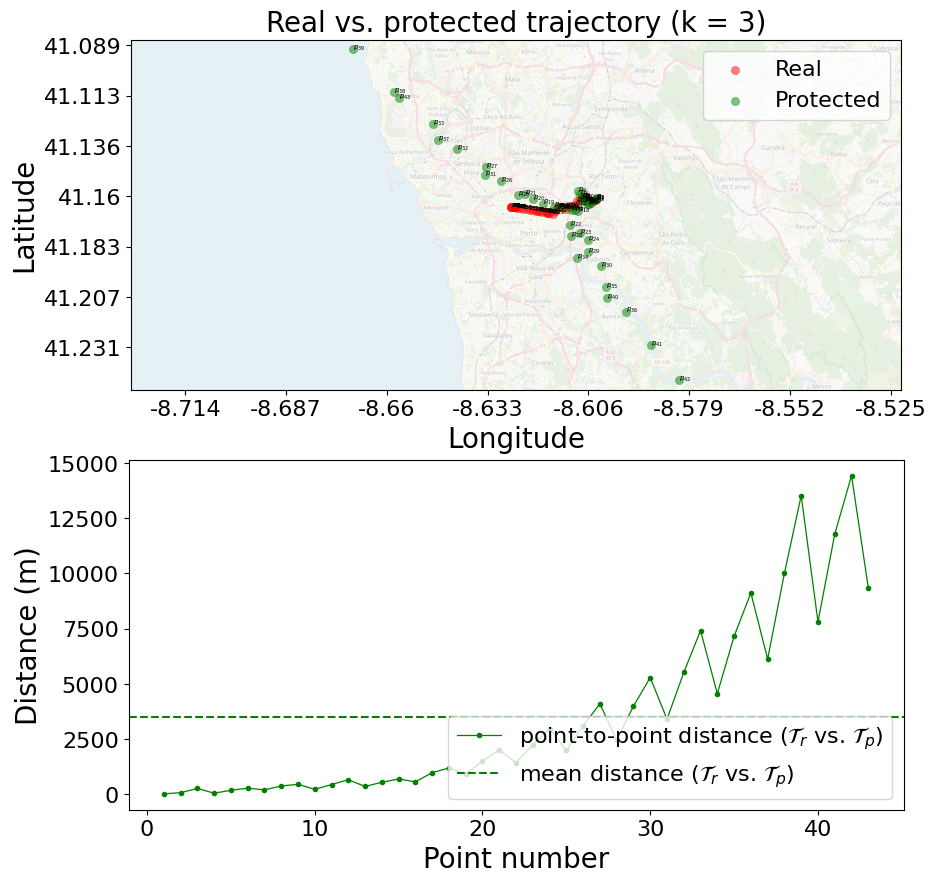

Point-to-point distance between the real and protected trajectory:
[np.float64(25.130232387984588), np.float64(75.4270991457569), np.float64(267.22581499609856), np.float64(54.18164240493658), np.float64(183.182861821388), np.float64(281.05576779963934), np.float64(202.52855877024894), np.float64(379.9309162845843), np.float64(454.0511956851456), np.float64(230.83067434072012), np.float64(442.66803829119), np.float64(663.4201251593787), np.float64(358.2548040574098), np.float64(548.3748875836372), np.float64(695.6920677376459), np.float64(568.1088657642281), np.float64(981.3810741648844), np.float64(1195.9864165984632), np.float64(922.5215224431295), np.float64(1504.7379434673326), np.float64(2015.2362123596456), np.float64(1431.9927850020674), np.float64(2246.7881540720846), np.float64(2959.944336933595), np.float64(1986.311475994669), np.float64(3106.4313358983786), np.float64(4101.761991449078), np.float64(2455.009264920305), np.float64(3992.7909579678003), np.float64(5289.234508215

<Figure size 640x480 with 0 Axes>

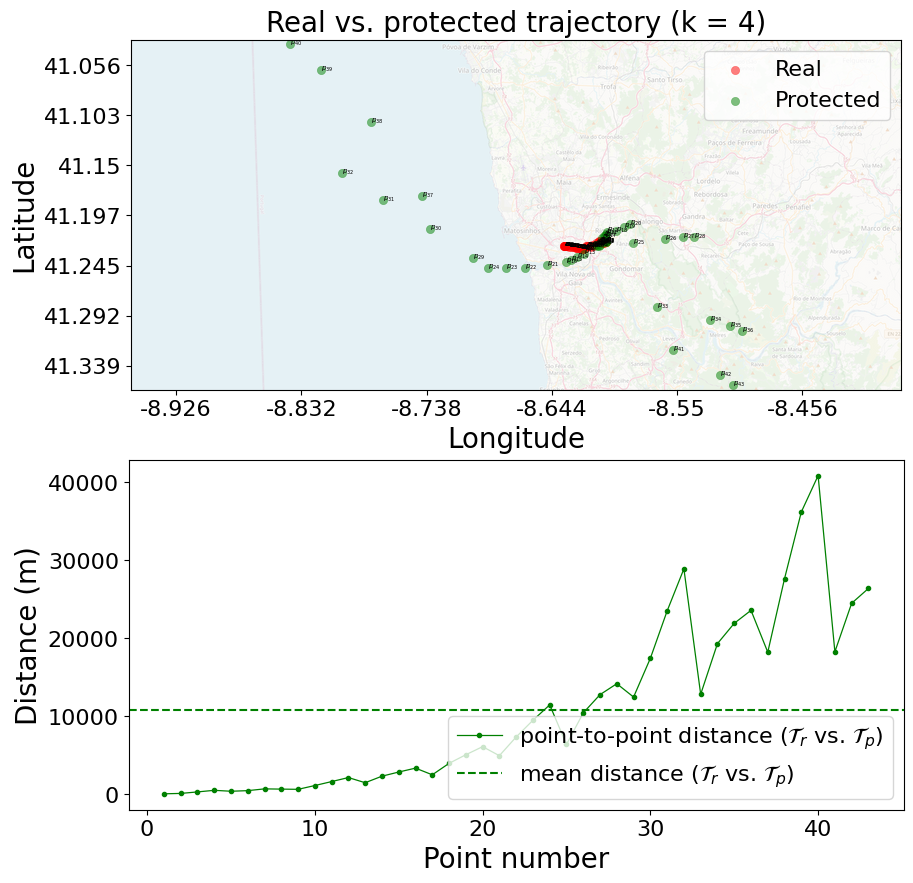

Point-to-point distance between the real and protected trajectory:
[np.float64(25.130232387984588), np.float64(75.4270991457569), np.float64(267.22581499609856), np.float64(473.0903445972461), np.float64(354.29867726434634), np.float64(431.50395697194926), np.float64(659.3697480184982), np.float64(628.54371734468), np.float64(601.4753241600561), np.float64(1087.77692109774), np.float64(1595.8461799187432), np.float64(2111.622713511693), np.float64(1448.8628314457249), np.float64(2287.5588172496505), np.float64(2821.4249920845537), np.float64(3322.3368721078245), np.float64(2465.5588500713748), np.float64(3934.4521063554357), np.float64(5039.2991673851), np.float64(6078.960016753759), np.float64(4919.433731201016), np.float64(7319.580796234222), np.float64(9463.000707131108), np.float64(11443.93396681755), np.float64(6356.602739886362), np.float64(10410.288247238293), np.float64(12755.72715810539), np.float64(14158.835048576331), np.float64(12446.078768640531), np.float64(17417.06776201

In [ ]:
# PLOTS for K experiments.

traj_id = 5

# Create deep copy Y_pred to avoid overwriting the original data
Y_test_cp = copy.deepcopy(Y_t)

# Denormalize the data
Y_test_dn = denormalize_data(dataset=Y_test_cp, normalization_ranges=normalization_ranges)

# Get the trajectory traj_id
actual = Y_test_dn[traj_id]

for i in range(1, 5):
    
    actuals = Y_t
    preds = Y_PREDS_Ks[i]

    # Create deep copy Y_pred to avoid overwriting the original data
    Y_pred_cp = copy.deepcopy(preds)
    
    # Denormalize the data
    Y_pred_dn = denormalize_data(dataset=Y_pred_cp, normalization_ranges=normalization_ranges)
    # print(Y_pred_dn)
    
    # Get the predicted trajectory traj_id
    predicted = Y_pred_dn[traj_id]

    # Compute the point-to-point distance between the real and protected trajectory
    dists = compute_point_to_point_haversine_distances(actual, predicted)

    lons_min_ext, lons_max_ext, lats_min_ext, lats_max_ext = plot_trajectory(real_traj = actual,
                protected_traj = predicted,
                dists = dists,
                save=True, 
                aspect_ratio=2.2,
                k=i)
    
    print("Point-to-point distance between the real and protected trajectory:")
    print (dists)
    print("Min/max longitudes and latitudes of the trajectories:")
    print(lons_min_ext, lons_max_ext, lats_min_ext, lats_max_ext)
    print("##################################")
    print("Mean distance between the real and protected trajectory (MDE_k):")
    print(np.mean(dists))
    print("##################################")

#### **Load Test Data and the Model (San Francisco dataset)** 

In [2]:
# Load the model generated by the training script from the 'training' folder
selected_dataset = "SANFRANCISCO"

subset = "test" # or "train" 

# Load trajectory data for faster execution
data = load_data_from_pickle(DATASET[selected_dataset], TOTAL_TRAJS)

# Get the data in the selected square
data = get_data_in_square(data = data, square = DATA_SQUARE[selected_dataset])

# Get trajectories min and max values
mins, maxs =  get_min_max_from_data(data)

# Normalize the data using the min and max values
normalization_ranges = {"min": mins, "max": maxs}

# Get number of trajectories
num_of_traj = len(data)

# Only keep the lat and lon columns for now
data = [data[i][COLUMNS] for i in range(num_of_traj)]

# Normalize the data using scaler or normalization ranges
scaler, data = normalize_trajectory_data(dataset = data, normalization_type = 'min-max')

# Load the test data
X_t = load_pickle(DATA_FOLDER + selected_dataset.lower() + "_X_"+subset+".pkl") # the input trajectory data
Y_t = load_pickle(DATA_FOLDER + selected_dataset.lower() + "_Y_"+subset+".pkl") # the true values of the trajectory data
traj_seq_lengths = load_pickle(DATA_FOLDER + selected_dataset.lower() + "_seq_len_"+subset+".pkl") # the sequence lenght of the input trajectory data

# Save the model
mdl = load_pickle(MODEL_FOLDER + "mdlgru-"+selected_dataset.lower()+".pkl")

# Model for BS = 1
model_sl = create_GRU_model(GRU_cells= LSTM_CELLS,
                          seq_len = 1,
                          num_feat = NUM_FEATS,
                          batch_size = 1,
                          stateful = True,
                          return_seq = RETURN_SEQ,
                          num_outputs = NUM_OUTPUTS,
                          LR = LR,
                          SEED = SEED,
                          ragged = False)


# Set weights and states
model_sl.set_weights(mdl.get_weights())


#### **Experiment 2 (SanFrancisco dataset) - Fixed k-** 

In [ ]:
# Test Fixed K
n_trajs = 10

Y_PREDS_Ks = {}

save_pickle(Y_t[:n_trajs], DATA_FOLDER + selected_dataset.lower() + "_Y_test_fixed_k_ntrajs_" + str(n_trajs) + ".pkl")
save_pickle(traj_seq_lengths[:n_trajs], DATA_FOLDER + selected_dataset.lower() + "_test_seq_len_fixed_k_ntrajs_" + str(n_trajs) + ".pkl")

for k in range(1, 6):
    print("Generating trajectories with k = " + str(k))
    
    # Generate the trajectories using the APU Trajectory Generator with fixed k
    # The function apu_trajgen_fixed_k generates trajectories with a fixed k value
    # It uses the model_sl, input trajectory data X_t, sequence lengths traj_seq_lengths,
    # and other parameters to generate the trajectories.
    Y_pred_k = apu_trajgen_fixed_k(mdl = model_sl,
                                X_t = copy.deepcopy(X_t)[:n_trajs],
                                test_traj_seq_lengths = traj_seq_lengths,
                                SEQ_LENGTH = 1,
                                NUM_FEATS = NUM_FEATS,
                                k_steps=k)
    
    
    # Save the generated trajectories
    save_pickle(Y_pred_k, DATA_FOLDER + selected_dataset.lower() + "_Y_pred_fixed_k_" + str(k) + "_ntrajs_" + str(n_trajs) + ".pkl")
    
    Y_PREDS_Ks[k] = Y_pred_k

Generating trajectories with k = 1
Processing trajectory: 0
Processing trajectory: 1
Processing trajectory: 2
Processing trajectory: 3
Processing trajectory: 4
Processing trajectory: 5
Processing trajectory: 6
Processing trajectory: 7
Processing trajectory: 8
Processing trajectory: 9
Generating trajectories with k = 2
Processing trajectory: 0
Processing trajectory: 1
Processing trajectory: 2
Processing trajectory: 3
Processing trajectory: 4
Processing trajectory: 5
Processing trajectory: 6
Processing trajectory: 7
Processing trajectory: 8
Processing trajectory: 9
Generating trajectories with k = 3
Processing trajectory: 0
Processing trajectory: 1
Processing trajectory: 2
Processing trajectory: 3
Processing trajectory: 4
Processing trajectory: 5
Processing trajectory: 6
Processing trajectory: 7
Processing trajectory: 8
Processing trajectory: 9
Generating trajectories with k = 4
Processing trajectory: 0
Processing trajectory: 1
Processing trajectory: 2
Processing trajectory: 3
Processing

#### **Plot a Trajectory** 

<Figure size 640x480 with 0 Axes>

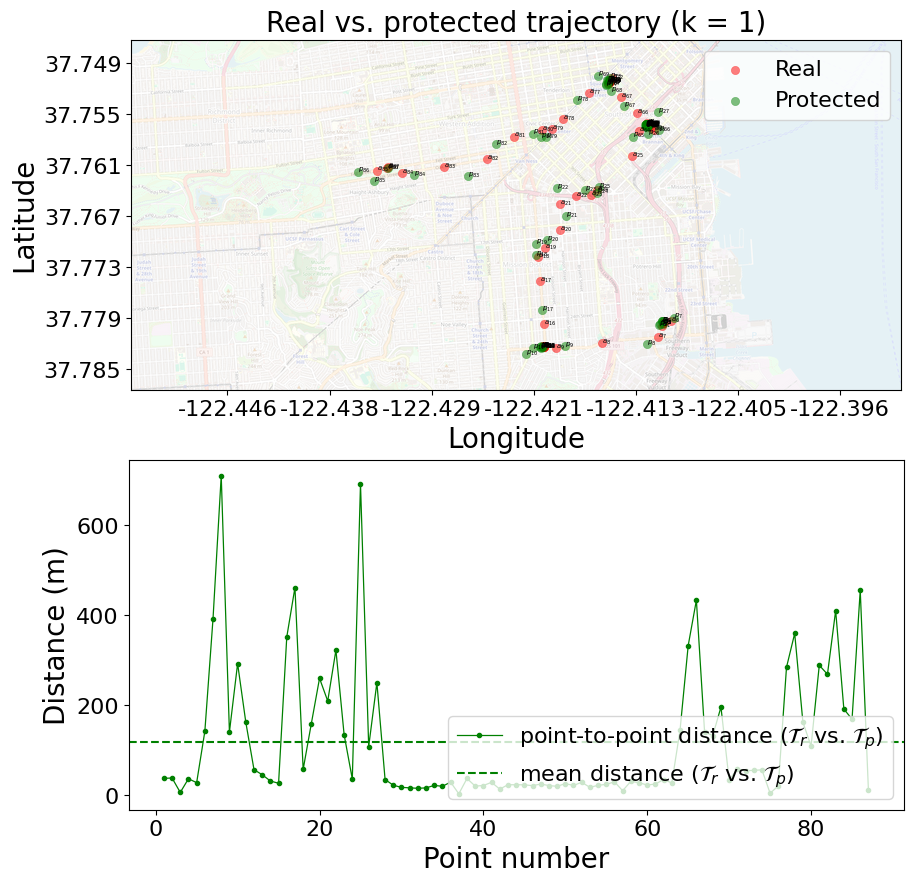

Point-to-point distance between the real and protected trajectory:
[np.float64(37.179122531416645), np.float64(38.00703626205893), np.float64(5.914729952583004), np.float64(36.3447449116199), np.float64(27.65542835951648), np.float64(141.7736373123725), np.float64(392.8581500847696), np.float64(710.7909950825073), np.float64(140.2469474949533), np.float64(292.6011078309213), np.float64(162.17320399485442), np.float64(56.62924070618762), np.float64(45.27235633786081), np.float64(31.336261320404553), np.float64(26.235551659007974), np.float64(351.66626447244676), np.float64(461.87332211871876), np.float64(57.01092422097044), np.float64(159.1782404130916), np.float64(259.86139210713935), np.float64(209.2523039193024), np.float64(322.6035668202917), np.float64(134.642960110511), np.float64(35.709675999342124), np.float64(692.2919108934741), np.float64(107.91659202731127), np.float64(250.11407767840066), np.float64(34.6526133680575), np.float64(21.952608506694308), np.float64(17.15870918621

<Figure size 640x480 with 0 Axes>

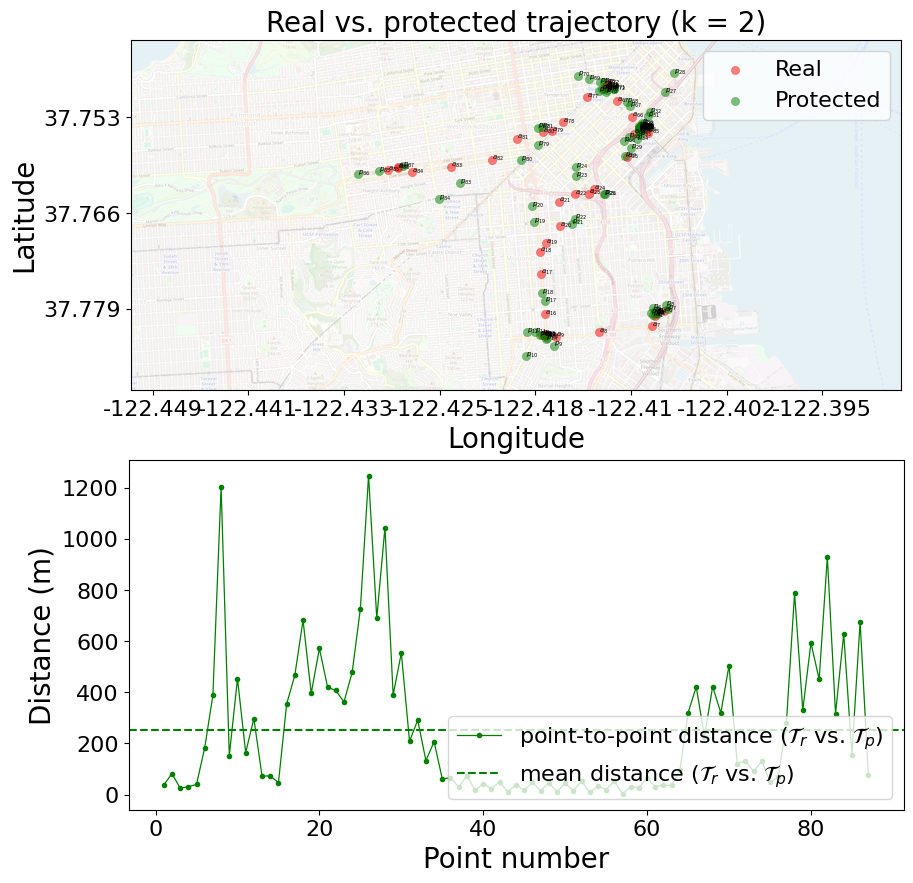

Point-to-point distance between the real and protected trajectory:
[np.float64(37.179122531416645), np.float64(81.70917655457563), np.float64(25.433924850250715), np.float64(30.583528760052058), np.float64(39.64517152830356), np.float64(182.88770941444685), np.float64(388.96532553602594), np.float64(1203.5233704192572), np.float64(152.11712295684683), np.float64(452.9078437289431), np.float64(164.13864457969177), np.float64(296.7821669945978), np.float64(71.84347411918758), np.float64(73.02385277888034), np.float64(46.51576526843604), np.float64(354.1103868903285), np.float64(466.4087752927064), np.float64(681.7355246608652), np.float64(395.52434185707153), np.float64(571.2721597352197), np.float64(420.00277059397644), np.float64(406.73800792133324), np.float64(362.19556201487393), np.float64(478.2588857339862), np.float64(726.4297784934879), np.float64(1246.7678592771024), np.float64(689.2468940493569), np.float64(1043.5380185660758), np.float64(388.7481894144819), np.float64(554.0259

<Figure size 640x480 with 0 Axes>

Point-to-point distance between the real and protected trajectory:
[np.float64(37.179122531416645), np.float64(81.70917655457563), np.float64(105.40129029913051), np.float64(58.27501924003527), np.float64(100.19296699696142), np.float64(147.87620361091388), np.float64(337.35475144653793), np.float64(1131.9009434376842), np.float64(1748.3920983381006), np.float64(998.7523605375638), np.float64(1687.9515599218641), np.float64(2177.2701674363684), np.float64(849.9182950323662), np.float64(1251.0822695082427), np.float64(1487.0569903636542), np.float64(955.917649429511), np.float64(1855.8275667908727), np.float64(2386.9605712209845), np.float64(1048.8052056593515), np.float64(1359.0610588440588), np.float64(1413.8041413932033), np.float64(749.1470111645043), np.float64(1144.7957635018968), np.float64(1426.4818585686833), np.float64(80.86309352802398), np.float64(255.55404018590164), np.float64(98.53793147292163), np.float64(159.1703385258483), np.float64(260.69956471438564), np.float64(332

<Figure size 640x480 with 0 Axes>

Point-to-point distance between the real and protected trajectory:
[np.float64(37.179122531416645), np.float64(81.70917655457563), np.float64(105.40129029913051), np.float64(115.345072136514), np.float64(55.773621777154915), np.float64(106.31286995781993), np.float64(389.45441999331905), np.float64(1069.545632123331), np.float64(201.67363328247134), np.float64(420.95671502128494), np.float64(714.9532683365476), np.float64(954.9070135138306), np.float64(353.20962077053815), np.float64(525.4166708660019), np.float64(621.1166533360476), np.float64(413.49848718572133), np.float64(775.0691410154874), np.float64(1177.6190610901817), np.float64(1387.6970595980392), np.float64(1795.9082831333635), np.float64(643.2029162185306), np.float64(958.3048781997707), np.float64(1277.2718253028838), np.float64(1463.1575943700357), np.float64(1303.323776337123), np.float64(2117.657877002477), np.float64(2361.6743080159154), np.float64(2548.272797670643), np.float64(1320.8302203280898), np.float64(1968.71

In [5]:
# PLOTS for K experiments.
traj_id = 8

# Create deep copy Y_pred to avoid overwriting the original data
Y_test_cp = copy.deepcopy(Y_t)

# Denormalize the data
normalization_ranges = {"min": mins[0:NUM_OUTPUTS], "max": maxs[0:NUM_OUTPUTS]}
Y_test_dn = denormalize_data(dataset=Y_test_cp, normalization_ranges=normalization_ranges)

# Get the trajectory traj_id
actual = Y_test_dn[traj_id]

for i in range(1, 5):
    
    actuals = Y_t
    preds = Y_PREDS_Ks[i]

    # Create deep copy Y_pred to avoid overwriting the original data
    Y_pred_cp = copy.deepcopy(preds)
    
    # Denormalize the data
    Y_pred_dn = denormalize_data(dataset=Y_pred_cp, normalization_ranges=normalization_ranges)
    
    # Get the predicted trajectory traj_id
    predicted = Y_pred_dn[traj_id]

    # Compute the point-to-point distance between the real and protected trajectory
    dists = compute_point_to_point_haversine_distances(actual, predicted)
    
    # Plot the trajectories
    lons_min_ext, lons_max_ext, lats_min_ext, lats_max_ext = plot_trajectory(real_traj = actual,
                protected_traj = predicted,
                dists = dists,
                save=True, 
                aspect_ratio=2.2,
                k=i)
    
    print("Point-to-point distance between the real and protected trajectory:")
    print (dists)
    print("Min/max longitudes and latitudes of the trajectories:")
    print(lons_min_ext, lons_max_ext, lats_min_ext, lats_max_ext)
    print("##################################")
    print("Mean distance between the real and protected trajectory (MDE_k):")
    print(np.mean(dists))
    print("##################################")